##**Network Analysis**

##### Mount G Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/5008 Project

/content/drive/.shortcut-targets-by-id/1bBIjKsvs3fOfhtXtLG83N0fVmT-uhzTl/5008 Project


##### Import Packages:

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

##### Load Data:

In [ ]:
df1 = pd.read_csv('./Transformed_Data/route_key_attributes.csv', index_col = 0)
G = nx.from_pandas_edgelist(df1, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph())

In [ ]:
G_undirected = nx.to_undirected(G)

###**Basic Properties:**

In [ ]:
# Graph Properties:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())
degrees = dict(G.degree())

avg_in_degree = sum(in_degrees.values()) / num_nodes
avg_out_degree = sum(out_degrees.values()) / num_nodes
avg_degree = sum(degrees.values()) / num_nodes

print('Number of nodes:', num_nodes)
print('Number of edges:', num_edges)
print('Average in-degree:', avg_in_degree)
print('Average out-degree:', avg_out_degree)
print('Average degree:', avg_degree)

Number of nodes: 3425
Number of edges: 37595
Average in-degree: 10.976642335766423
Average out-degree: 10.976642335766423
Average degree: 21.953284671532845


In [ ]:
df = df1[['source_airport_iata', 'destination_airport_iata', 'name', 'src_ap_id', 'des_ap_id']]
df.rename(columns={'name': 'src_ap_name'}, inplace=True)

temp = pd.read_csv('./Transformed_Data/src_des_info.csv')
temp = temp[['destination_airport_iata', 'des_ap_name']]
temp.drop_duplicates(subset=['destination_airport_iata'], inplace=True)

df = df.merge(temp, on='destination_airport_iata')

<ipython-input-7-c01cd5c7f3e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'name': 'src_ap_name'}, inplace=True)


In [ ]:
source = {x: y for x, y in in_degrees.items() if y==0}

source_ap = pd.Series()
for i in source.keys():
  ap = df.iloc[df[df['src_ap_id'] == i].index][['source_airport_iata', 'src_ap_name']]
  source_ap = pd.concat([source_ap, ap])

source_ap

<ipython-input-184-ad195cf4d3f6>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  source_ap = pd.Series()


,0,source_airport_iata,src_ap_name
56249,NaN,LJA,Lodja Airport
49171,NaN,IUE,Niue International Airport
66886,NaN,STZ,Santa Terezinha Airport
66883,NaN,SXX,SÃ£o FÃ©lix do Xingu Airport
66996,NaN,PTJ,Portland Airport
33893,NaN,VDA,Ovda Airport
65404,NaN,MSW,Massawa International Airport


In [ ]:
sink = {x: y for x, y in out_degrees.items() if y==0}

sink_ap = pd.Series()
for i in sink.keys():
  ap = df.iloc[df[df['des_ap_id'] == i].index][['destination_airport_iata', 'des_ap_name']]
  sink_ap = pd.concat([sink_ap, ap])

sink_ap.drop_duplicates(inplace=True)
sink_ap

<ipython-input-188-d3a6fd02d085>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sink_ap = pd.Series()


,0,destination_airport_iata,des_ap_name
3136,NaN,KZB,Zachar Bay Seaplane Base
3138,NaN,KYK,Karluk Airport
3141,NaN,KPR,Port Williams Seaplane Base
41355,NaN,CZJ,CorazÃ³n de JesÃºs Airport
53550,NaN,SPI,Abraham Lincoln Capital Airport
61211,NaN,FMI,Kalemie Airport
63138,NaN,TUA,Lieutenant Colonel Luis A. Mantilla Internatio...
64947,NaN,QFX,Igaliku Heliport
64993,NaN,KZI,Kozani State Airport Filippos
66024,NaN,ORX,OriximinÃ¡ Airport


###**Degree Distribution & Power-Law:**

In [ ]:
indegree_seq = sorted([d for n, d in G.in_degree()], reverse=True)
indegree_counts = Counter(indegree_seq)
indegree_freq = [indegree_counts.get(i, 0) for i in range(max(indegree_counts) + 1)]
indegrees = range(len(indegree_freq))

outdegree_seq = sorted([d for n, d in G.out_degree()], reverse=True)
outdegree_counts = Counter(outdegree_seq)
outdegree_freq = [outdegree_counts.get(i, 0) for i in range(max(outdegree_counts) + 1)]
outdegrees = range(len(outdegree_freq))

In [ ]:
top5_indegree = sorted({n:d for n, d in G.in_degree()}.items(), key=lambda x: x[1], reverse=True)[:5]
top5_in_ap = pd.DataFrame(top5_indegree, columns=['src_ap_id','indegree'])
temp = df[['src_ap_id', 'source_airport_iata', 'src_ap_name']]
temp.drop_duplicates(subset=['src_ap_id'], inplace=True)
top5_in_ap.merge(temp, on='src_ap_id')

<ipython-input-118-b8568afbdccd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop_duplicates(subset=['src_ap_id'], inplace=True)


,src_ap_id,indegree,source_airport_iata,src_ap_name
0,454,238,FRA,Frankfurt Airport
1,442,233,CDG,Charles de Gaulle International Airport
2,220,231,AMS,Amsterdam Airport Schiphol
3,791,230,IST,Ä°stanbul Airport
4,195,216,ATL,Hartsfield Jackson Atlanta International Airport


In [ ]:
top5_outdegree = sorted({n:d for n, d in G.out_degree()}.items(), key=lambda x: x[1], reverse=True)[:5]
top5_out_ap = pd.DataFrame(top5_outdegree, columns=['src_ap_id','outdegree'])
temp = df[['src_ap_id', 'source_airport_iata', 'src_ap_name']]
temp.drop_duplicates(subset=['src_ap_id'], inplace=True)
top5_out_ap.merge(temp, on='src_ap_id')

<ipython-input-119-063c31dc54b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop_duplicates(subset=['src_ap_id'], inplace=True)


,src_ap_id,outdegree,source_airport_iata,src_ap_name
0,454,239,FRA,Frankfurt Airport
1,442,237,CDG,Charles de Gaulle International Airport
2,220,232,AMS,Amsterdam Airport Schiphol
3,791,227,IST,Ä°stanbul Airport
4,195,217,ATL,Hartsfield Jackson Atlanta International Airport


In [ ]:
# !pip install powerlaw
import powerlaw
results_in = powerlaw.Fit([d for n, d in G.in_degree()], xmin_distance='D')
print(results_in.power_law.alpha)
print(results_in.xmin)

results_out = powerlaw.Fit([d for n, d in G.out_degree()], xmin_distance='D')
print(results_out.power_law.alpha)
print(results_out.xmin)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
1.8748355413271838
2.0
Calculating best minimal value for power law fit
1.8779828411355186
2.0


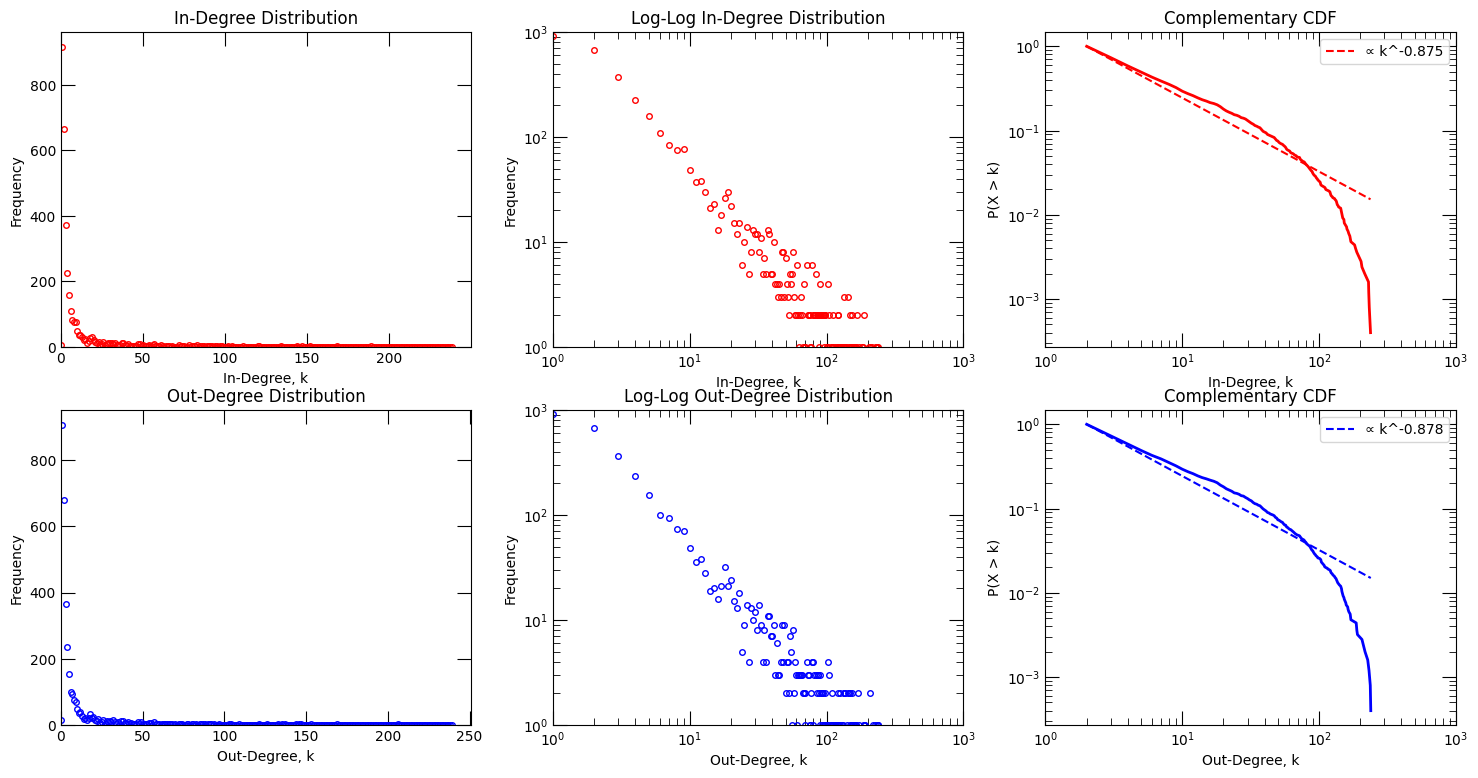

In [ ]:
# Linear-linear and Log-log Degree Histograms:

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18,9))

ax1.plot(indegrees, indegree_freq, 'ro', mfc='none', linestyle='None', markersize=4)
ax1.tick_params(which='major', direction='in', length=10, top=True, right=True)
ax1.tick_params(which='minor', direction='in', length=5, top=True, right=True)
ax1.tick_params(labelsize=10)
ax1.set_xlim(0,)
ax1.set_ylim(0,)
ax1.set_xlabel('In-Degree, k', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)
ax1.set_title('In-Degree Distribution', fontsize=12)

ax2.loglog(indegrees, indegree_freq, 'ro', mfc='none', linestyle='None', markersize=4)
ax2.tick_params(which='major', direction='in', length=10, top=True, right=True)
ax2.tick_params(which='minor', direction='in', length=5, top=True, right=True)
ax2.tick_params(labelsize=10)
ax2.set_xlim(10**0, 10**3)
ax2.set_ylim(10**0, 10**3)
ax2.set_xlabel('In-Degree, k', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)
ax2.set_title('Log-Log In-Degree Distribution', fontsize=12)

results_in.plot_ccdf(color='r', linewidth=2, ax=ax3)
results_in.power_law.plot_ccdf(color='r', linestyle='--', ax=ax3, label='∝ k^-0.875')
ax3.tick_params(which='major', direction='in', length=10, top=True, right=True)
ax3.tick_params(which='minor', direction='in', length=5, top=True, right=True)
ax3.tick_params(labelsize=10)
ax3.set_xlim(10**0, 10**3)
ax3.set_xlabel('In-Degree, k', fontsize=10)
ax3.set_ylabel('P(X > k)', fontsize=10)
ax3.set_title('Complementary CDF', fontsize=12)
ax3.legend()

ax4.plot(outdegrees, outdegree_freq, 'bo', mfc='none', linestyle='None', markersize=4)
ax4.tick_params(which='major', direction='in', length=10, top=True, right=True)
ax4.tick_params(which='minor', direction='in', length=5, top=True, right=True)
ax4.tick_params(labelsize=10)
ax4.set_xlim(0,)
ax4.set_ylim(0,)
ax4.set_xlabel('Out-Degree, k', fontsize=10)
ax4.set_ylabel('Frequency', fontsize=10)
ax4.set_title('Out-Degree Distribution', fontsize=12)

ax5.loglog(outdegrees, outdegree_freq, 'bo', mfc='none', linestyle='None', markersize=4)
ax5.tick_params(which='major', direction='in', length=10, top=True, right=True)
ax5.tick_params(which='minor', direction='in', length=5, top=True, right=True)
ax5.tick_params(labelsize=10)
ax5.set_xlim(10**0, 10**3)
ax5.set_ylim(10**0, 10**3)
ax5.set_xlabel('Out-Degree, k', fontsize=10)
ax5.set_ylabel('Frequency', fontsize=10)
ax5.set_title('Log-Log Out-Degree Distribution', fontsize=12)

results_out.plot_ccdf(color='b', linewidth=2, ax=ax6)
results_out.power_law.plot_ccdf(color='b', linestyle='--', ax=ax6, label='∝ k^-0.878')
ax6.tick_params(which='major', direction='in', length=10, top=True, right=True)
ax6.tick_params(which='minor', direction='in', length=5, top=True, right=True)
ax6.tick_params(labelsize=10)
ax6.set_xlim(10**0, 10**3)
ax6.set_xlabel('Out-Degree, k', fontsize=10)
ax6.set_ylabel('P(X > k)', fontsize=10)
ax6.set_title('Complementary CDF', fontsize=12)
ax6.legend()

plt.show()

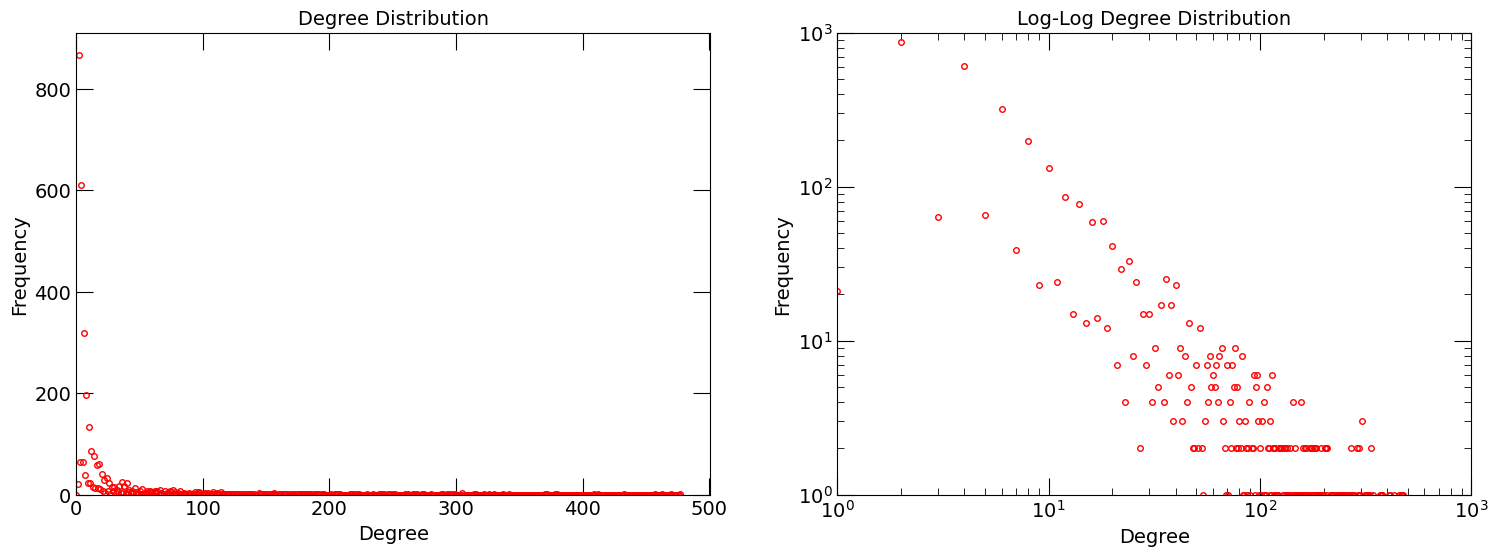

In [ ]:
# Linear-linear and Log-log Degree Histograms:

degree_seq = sorted([d for n, d in G.degree()], reverse=True)
degree_counts = Counter(degree_seq)
degree_freq = [degree_counts.get(i, 0) for i in range(max(degree_counts) + 1)]
degrees = range(len(degree_freq))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

ax1.plot(degrees, degree_freq, 'ro', mfc='none',linestyle='None', markersize=4)
ax1.tick_params(which='major', direction='in', length=12, top=True, right=True)
ax1.tick_params(which='minor', direction='in', length=12, top=True, right=True)
ax1.tick_params(labelsize=14)

ax1.set_xlim(0,)
ax1.set_ylim(0,)

ax1.set_xlabel('Degree', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.set_title('Degree Distribution', fontsize=14)

ax2.loglog(degrees, degree_freq, 'ro', mfc='none',linestyle='None', markersize=4)
ax2.tick_params(which='major', direction='in', length=12, top=True, right=True)
ax2.tick_params(which='minor', direction='in', length=5, top=True, right=True)
ax2.tick_params(labelsize=14)

ax2.set_xlim(10**0, 10**3)
ax2.set_ylim(10**0, 10**3)

ax2.set_xlabel('Degree', fontsize=14)
ax2.set_ylabel('Frequency', fontsize=14)
ax2.set_title('Log-Log Degree Distribution', fontsize=14)

plt.show()

###**Shortest Path Length:**

In [ ]:
path_len = nx.all_pairs_shortest_path_length(G)
for s, s2t in path_len:
  print(s, s2t)
  break

0 {0: 0, 7: 1, 788: 1, 1025: 1, 1742: 1, 1774: 1, 869: 1, 693: 1, 682: 1, 3: 1, 791: 1, 8: 1, 2505: 1, 595: 1, 14: 1, 792: 1, 352: 1, 681: 1, 1: 2, 2: 2, 4: 2, 424: 2, 89: 2, 794: 2, 242: 2, 246: 2, 787: 2, 351: 2, 789: 2, 1988: 2, 419: 2, 790: 2, 13: 2, 793: 2, 319: 2, 1801: 2, 358: 2, 19: 2, 454: 2, 2103: 2, 2646: 2, 817: 2, 9: 2, 10: 2, 823: 2, 828: 2, 432: 2, 222: 2, 1023: 2, 449: 2, 452: 2, 1024: 2, 53: 2, 470: 2, 473: 2, 1026: 2, 489: 2, 494: 2, 496: 2, 695: 2, 189: 2, 495: 2, 2244: 2, 235: 2, 457: 2, 220: 2, 59: 2, 1779: 2, 1036: 2, 130: 2, 1520: 2, 440: 2, 1136: 2, 442: 2, 52: 2, 5: 2, 455: 2, 6: 2, 1137: 2, 135: 2, 474: 2, 479: 2, 672: 2, 673: 2, 340: 2, 1780: 2, 1390: 2, 497: 2, 304: 2, 1035: 2, 2454: 2, 241: 2, 164: 2, 278: 2, 243: 2, 171: 2, 468: 2, 346: 2, 244: 2, 580: 2, 245: 2, 178: 2, 349: 2, 2455: 2, 2456: 2, 856: 2, 857: 2, 232: 2, 2211: 2, 694: 2, 2077: 2, 829: 2, 2831: 2, 819: 2, 12: 2, 2992: 2, 1812: 2, 487: 2, 15: 2, 16: 2, 247: 2, 21: 2, 683: 2, 810: 2, 811: 2, 8

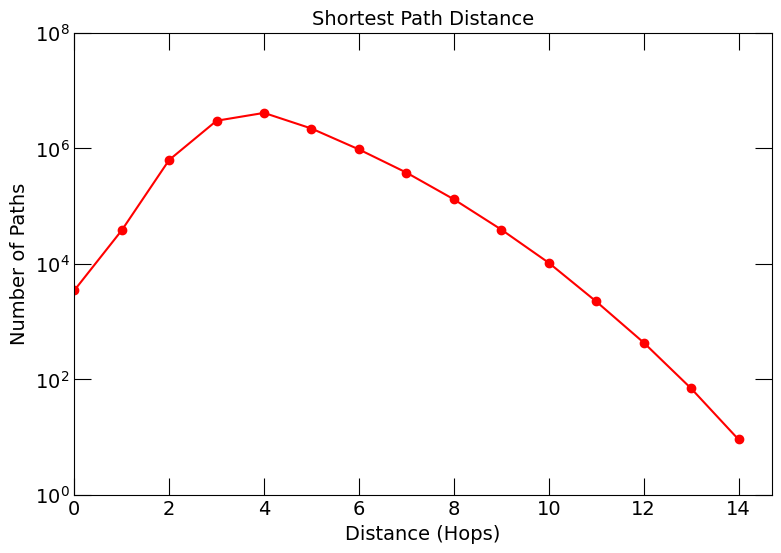

In [ ]:
# Number of Paths vs Shortest Path Distance:

dis_seq = []
path_len = nx.all_pairs_shortest_path_length(G)

for s, s2t in path_len:
  dis_seq += list(s2t.values())

dis_counts = Counter(dis_seq)
dis_freq = [dis_counts.get(i,0) for i in range(max(dis_counts)+1)]
distances = range(len(dis_freq))

fig, ax = plt.subplots(figsize=(9,6))

ax.plot(distances, dis_freq, 'ro-')
ax.tick_params(which='major', direction='in', length=12, top=True, right=True)
ax.tick_params(which='minor', direction='in', length=5, top=True, right=True)
ax.tick_params(labelsize=14)

ax.set_xlim(0,)
ax.set_ylim(10**0, 10**8)
ax.set_yscale('log')

ax.set_xlabel('Distance (Hops)', fontsize=14)
ax.set_ylabel('Number of Paths', fontsize=14)
plt.title('Shortest Path Distance', fontsize=14)

plt.show()

###**Clustering Coefficient:**

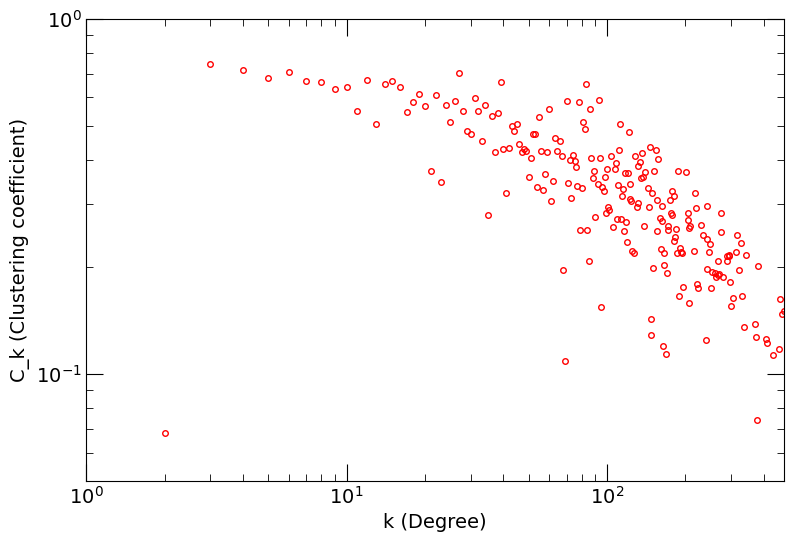

Average Clustering Coefficient: 0.4692087972063501


In [ ]:
# Average Clustering Coefficient vs Degree:

degree_seq = np.array([d_i for n_i, d_i in nx.degree(G)])
coef = nx.clustering(G)
coef = np.array(list(coef.values()))

degree_unique = np.unique(degree_seq)
degree_unique = np.delete(degree_unique, np.where(degree_unique==1))  # remove degree of 1 

coef_d_list = []
for d in degree_unique:
    mask_d = (degree_seq == d)
    coef_d = coef[mask_d].mean()
    coef_d_list.append(coef_d)
    
fig, ax = plt.subplots(figsize=(9,6))

ax.loglog(degree_unique, coef_d_list, 'ro', linestyle='none', markerfacecolor='none', markersize=4)
ax.tick_params(which='major', direction='in', length=12, top=True, right=True)
ax.tick_params(which='minor', direction='in', length=5, top=True, right=True)
ax.tick_params(labelsize=14)

ax.set_xlim(10**0, max(degree_unique))
ax.set_ylim(5*10**-2, 10**0)

ax.set_xlabel('k (Degree)', fontsize=14)
ax.set_ylabel('C_k (Clustering coefficient)', fontsize=14)

plt.show()

print('Average Clustering Coefficient:', nx.average_clustering(G))

###**Connect Components:**

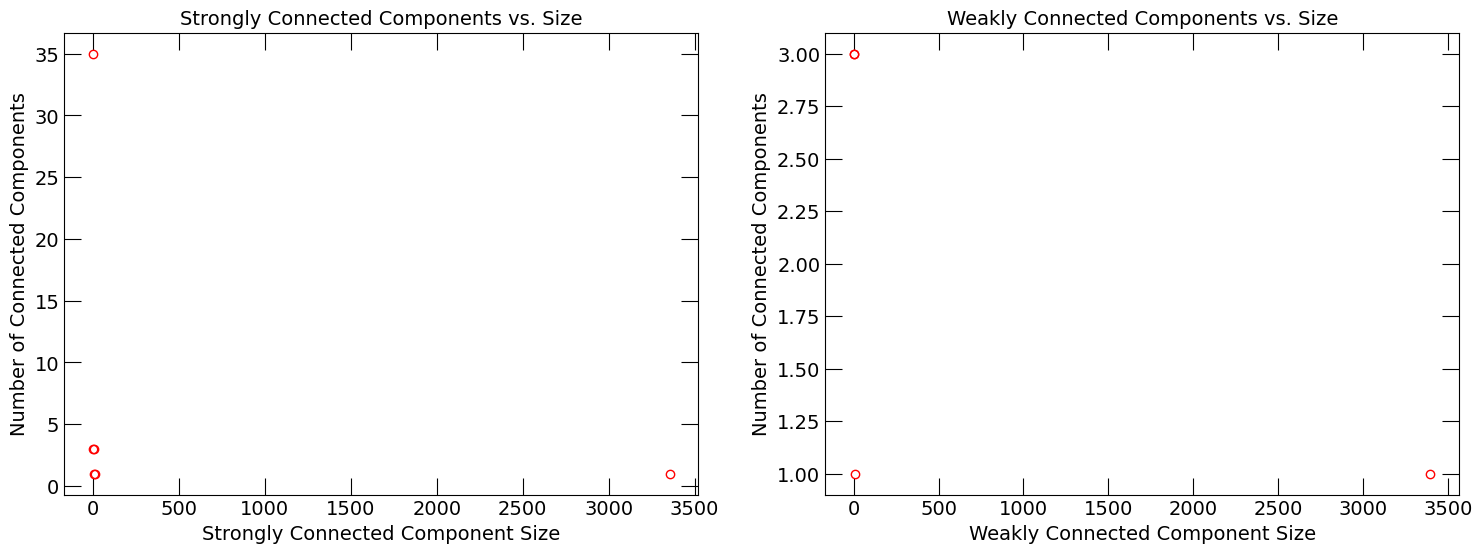

Strongly Connected Components: Counter({1: 35, 4: 3, 2: 3, 3354: 1, 10: 1, 8: 1})
Weakly Connected Components: Counter({4: 3, 2: 3, 3397: 1, 10: 1})


In [ ]:
# Number of Connected Components vs Size

scc = nx.strongly_connected_components(G)
scc_seq = [len(i) for i in sorted(scc, key=len, reverse=True)]
scc_counts = Counter(scc_seq)

wcc = nx.weakly_connected_components(G)
wcc_seq = [len(i) for i in sorted(wcc, key=len, reverse=True)]
wcc_counts = Counter(wcc_seq)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

ax1.plot(scc_counts.keys(), scc_counts.values(), 'ro', markerfacecolor='none', markersize=6)

ax1.tick_params(which='major', direction='in', length=12, top=True, right=True)
ax1.tick_params(which='minor', direction='in', length=5, top=True, right=True)
ax1.tick_params(labelsize=14)

ax1.set_xlabel('Strongly Connected Component Size', fontsize=14)
ax1.set_ylabel('Number of Connected Components', fontsize=14)
ax1.set_title('Strongly Connected Components vs. Size', fontsize=14)

ax2.plot(wcc_counts.keys(), wcc_counts.values(), 'ro', markerfacecolor='none', markersize=6)

ax2.tick_params(which='major', direction='in', length=12, top=True, right=True)
ax2.tick_params(which='minor', direction='in', length=5, top=True, right=True)
ax2.tick_params(labelsize=14)

ax2.set_xlabel('Weakly Connected Component Size', fontsize=14)
ax2.set_ylabel('Number of Connected Components', fontsize=14)
ax2.set_title('Weakly Connected Components vs. Size', fontsize=14)

plt.show()

print('Strongly Connected Components:', scc_counts)
print('Weakly Connected Components:', wcc_counts)

###**Centrality:**

In [ ]:
## Undirected Graph:
nx_deg = nx.degree(G_undirected)
nx_deg_centrality = nx.degree_centrality(G_undirected)

In [ ]:
## Directed Graph:
from math import trunc

nx_deg_centrality = nx.degree_centrality(G)
nx_in_deg_centrality = nx.in_degree_centrality(G)
nx_out_deg_centrality = nx.out_degree_centrality(G)
nx_betwn_centrality = nx.betweenness_centrality(G)
nx_close_centrality = nx.closeness_centrality(G)
nx_eigen_centrality = nx.eigenvector_centrality(G)
nx_pagerank = nx.pagerank(G)

In [ ]:
df_cent = pd.DataFrame(np.zeros((G.number_of_nodes(), 7)), columns = ['node', 'in_deg_cent', 'out_deg_cent', 'btw_cent', 'cls_cent', 'eigen_cent','pagerank'])
for i, node in enumerate(G.nodes()):
  df_cent['node'][i] = node
  df_cent['in_deg_cent'][i] = nx_in_deg_centrality[node]
  df_cent['out_deg_cent'][i] = nx_out_deg_centrality[node]
  df_cent['btw_cent'][i] = nx_betwn_centrality[node]
  df_cent['cls_cent'][i] = nx_close_centrality[node]
  df_cent['eigen_cent'][i] = nx_eigen_centrality[node]
  df_cent['pagerank'][i] = nx_pagerank[node]

In [ ]:
temp1 = df[['src_ap_name', 'src_ap_id']]
temp1.rename(columns={'src_ap_name':'ap_name', 'src_ap_id':'ap_id'}, inplace=True)

temp2 = df[['des_ap_name', 'des_ap_id']]
temp2.rename(columns={'des_ap_name':'ap_name', 'des_ap_id':'ap_id'}, inplace=True)

temp3 = pd.concat([temp1, temp2])
temp3.drop_duplicates(subset=['ap_id'], inplace=True)
temp3.rename(columns={'ap_id':'node'}, inplace=True)

<ipython-input-23-a3e54c100a12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1.drop_duplicates(subset=['src_ap_id'], inplace=True)


In [ ]:
df_cent.node = df_cent.node.astype(int)
df_cent = df_cent.merge(temp3, on='node')
df_cent.to_csv('./Transformed_Data/centrality.csv', index = False)

In [ ]:
df_cent

,node,in_deg_cent,out_deg_cent,btw_cent,cls_cent,eigen_cent,pagerank,ap_name
0,0,0.005257,0.004965,2.437452e-05,0.276686,0.009110,0.000343,Sochi International Airport
1,7,0.006133,0.006133,4.911256e-05,0.278473,0.008890,0.000404,Kazan International Airport
2,1,0.002044,0.002044,7.817094e-07,0.266837,0.004766,0.000161,Astrakhan Narimanovo Boris M. Kustodiev Intern...
3,9,0.004673,0.004673,2.958986e-05,0.286819,0.009875,0.000311,Mineralnyye Vody Airport
4,2,0.004089,0.004089,4.369093e-06,0.268607,0.006755,0.000274,Chelyabinsk Balandino Airport
...,...,...,...,...,...,...,...,...
3420,3407,0.000584,0.000584,1.706433e-07,0.200301,0.000013,0.000213,Winton Airport
3421,3398,0.000292,0.000292,0.000000e+00,0.246991,0.000258,0.000076,Lismore Airport
3422,3400,0.000876,0.000876,5.622441e-07,0.247488,0.000465,0.000155,Merimbula Airport
3423,3401,0.000584,0.000584,0.000000e+00,0.247009,0.000264,0.000120,Moruya Airport


In [ ]:
# Top10 airports with highest in-degree centrality
df_cent.sort_values(by='in_deg_cent', ascending=False)[['in_deg_cent', 'ap_name']].iloc[:10]

,in_deg_cent,ap_name
502,0.069509,Frankfurt Airport
449,0.068049,Charles de Gaulle International Airport
227,0.067465,Amsterdam Airport Schiphol
797,0.067173,Ä°stanbul Airport
202,0.063084,Hartsfield Jackson Atlanta International Airport
290,0.060164,Beijing Capital International Airport
126,0.059287,Chicago O'Hare International Airport
193,0.055199,Munich Airport
6,0.055199,Domodedovo International Airport
373,0.054030,Dallas Fort Worth International Airport


In [ ]:
# Top10 airports with highest out-degree centrality
df_cent.sort_values(by='out_deg_cent', ascending=False)[['out_deg_cent', 'ap_name']].iloc[:10]

,out_deg_cent,ap_name
502,0.069801,Frankfurt Airport
449,0.069217,Charles de Gaulle International Airport
227,0.067757,Amsterdam Airport Schiphol
797,0.066297,Ä°stanbul Airport
202,0.063376,Hartsfield Jackson Atlanta International Airport
126,0.060164,Chicago O'Hare International Airport
290,0.060164,Beijing Capital International Airport
193,0.055783,Munich Airport
6,0.055199,Domodedovo International Airport
167,0.054907,Dubai International Airport


In [ ]:
# Top10 airports with highest betweenness-degree centrality
df_cent.sort_values(by='btw_cent', ascending=False)[['btw_cent', 'ap_name']].iloc[:10]

,btw_cent,ap_name
717,0.070204,Ted Stevens Anchorage International Airport
345,0.066164,Los Angeles International Airport
449,0.061703,Charles de Gaulle International Airport
167,0.059350,Dubai International Airport
502,0.051000,Frankfurt Airport
290,0.049167,Beijing Capital International Airport
126,0.047430,Chicago O'Hare International Airport
1191,0.045268,SeattleâTacoma International Airport
227,0.042658,Amsterdam Airport Schiphol
1062,0.042527,Lester B. Pearson International Airport


In [ ]:
# Top10 airports with highest closeness-degree centrality
df_cent.sort_values(by='cls_cent', ascending=False)[['cls_cent', 'ap_name']].iloc[:10]

,cls_cent,ap_name
502,0.392389,Frankfurt Airport
449,0.389993,Charles de Gaulle International Airport
467,0.388306,London Heathrow Airport
167,0.384084,Dubai International Airport
227,0.382932,Amsterdam Airport Schiphol
345,0.379042,Los Angeles International Airport
375,0.377277,John F Kennedy International Airport
1062,0.372411,Lester B. Pearson International Airport
797,0.371370,Ä°stanbul Airport
126,0.370376,Chicago O'Hare International Airport


In [ ]:
# Top10 airports with highest eigenvector-degree centrality
df_cent.sort_values(by='eigen_cent', ascending=False)[['eigen_cent', 'ap_name']].iloc[:10]

,eigen_cent,ap_name
227,0.165909,Amsterdam Airport Schiphol
502,0.165748,Frankfurt Airport
449,0.159224,Charles de Gaulle International Airport
193,0.148957,Munich Airport
467,0.137050,London Heathrow Airport
457,0.135864,RomeâFiumicino Leonardo da Vinci Internation...
797,0.129644,Ä°stanbul Airport
137,0.129428,Josep Tarradellas Barcelona-El Prat Airport
50,0.126192,ZÃ¼rich Airport
495,0.123239,Adolfo SuÃ¡rez MadridâBarajas Airport


In [ ]:
# Top10 airports with highest pagerank-degree centrality
df_cent.sort_values(by='pagerank', ascending=False)[['pagerank', 'ap_name']].iloc[:10]

,pagerank,ap_name
202,0.004666,Hartsfield Jackson Atlanta International Airport
797,0.004388,Ä°stanbul Airport
126,0.004275,Chicago O'Hare International Airport
1208,0.004251,Denver International Airport
373,0.004180,Dallas Fort Worth International Airport
6,0.004110,Domodedovo International Airport
449,0.003941,Charles de Gaulle International Airport
502,0.003830,Frankfurt Airport
290,0.003811,Beijing Capital International Airport
167,0.003645,Dubai International Airport


In [ ]:
df_cent.sort_values(by='eigen_cent', ascending=True)['eigen_cent'].mean()

0.006084328396495903

In [ ]:
df_cent.sort_values(by='pagerank', ascending=True)['pagerank'].mean()

0.00029197080291970805

###**Cluster:**

In [ ]:
clus_coef = nx.clustering(G)
temp_df1 = pd.DataFrame(clus_coef.keys(), columns=['node'])
temp_df2 = pd.DataFrame(clus_coef.values(), columns=['clus_coef'])
df_clus = pd.concat([temp_df1, temp_df2], axis=1)
# df_clus.to_csv('./Transformed_Data/clustering_coefficient.csv', index = False)

In [ ]:
df_clus['clus_coef'].value_counts()

0.000000    984
1.000000    708
0.666667    159
0.500000    148
0.333333     70
           ... 
0.519076      1
0.438596      1
0.460591      1
0.456989      1
0.133333      1
Name: clus_coef, Length: 887, dtype: int64

###**Airline Reachability:**

In [ ]:
df3 = pd.read_csv('./Transformed_Data/route_key_attributes.csv', index_col = 0)
G = nx.from_pandas_edgelist(df3, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph())

In [ ]:
## Top 25 Airlines by routes:

df2 = df.copy()
#df2 = df2[df2['airline'] == 'CX']
df2['route'] = df2['source_airport_iata'].str.cat(df2['destination_airport_iata'], sep = "-")

df2 = df2.groupby('airline')['route'].nunique().sort_values(ascending=False)

df2 = pd.DataFrame(df2).head(25)
#df2

top_airlines = list(df2.index.values)
top_airlines

['FR',
 'AA',
 'UA',
 'DL',
 'US',
 'CZ',
 'MU',
 'CA',
 'WN',
 'U2',
 'AF',
 'LH',
 'AZ',
 'IB',
 'KL',
 'ZH',
 'AB',
 'FL',
 'AC',
 'TK',
 'DY',
 'HU',
 'BA',
 'NH',
 'AS']

In [ ]:
# Top 25 dfs:

df_FR = df3[df3['airline'] == 'FR']
df_AA = df3[df3['airline'] == 'AA']
df_UA = df3[df3['airline'] == 'UA']
df_DL = df3[df3['airline'] == 'DL']
df_US = df3[df3['airline'] == 'US']
df_CZ = df3[df3['airline'] == 'CZ']
df_MU = df3[df3['airline'] == 'MU']
df_CA = df3[df3['airline'] == 'CA']
df_WN = df3[df3['airline'] == 'WN']
df_U2 = df3[df3['airline'] == 'U2']
df_AF = df3[df3['airline'] == 'AF']
df_LH = df3[df3['airline'] == 'LH']
df_AZ = df3[df3['airline'] == 'AZ']
df_IB = df3[df3['airline'] == 'IB']
df_KL = df3[df3['airline'] == 'KL']
df_ZH = df3[df3['airline'] == 'ZH']
df_AB = df3[df3['airline'] == 'AB']
df_FL = df3[df3['airline'] == 'FL']
df_AC = df3[df3['airline'] == 'AC']
df_TK = df3[df3['airline'] == 'TK']
df_DY = df3[df3['airline'] == 'DY']
df_HU = df3[df3['airline'] == 'HU']
df_BA = df3[df3['airline'] == 'BA']
df_NH = df3[df3['airline'] == 'NH']
df_AS = df3[df3['airline'] == 'AS']

# Only take SCC of Disconnected DiGraph:
sccs = list(nx.strongly_connected_components(G))
scc = max(sccs, key=len)

G_FR = nx.from_pandas_edgelist(df_FR, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_AA = nx.from_pandas_edgelist(df_AA, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_UA = nx.from_pandas_edgelist(df_UA, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_DL = nx.from_pandas_edgelist(df_DL, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_US = nx.from_pandas_edgelist(df_US, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_CZ = nx.from_pandas_edgelist(df_CZ, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_MU = nx.from_pandas_edgelist(df_MU, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_CA = nx.from_pandas_edgelist(df_CA, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_WN = nx.from_pandas_edgelist(df_WN, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_U2 = nx.from_pandas_edgelist(df_U2, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_AF = nx.from_pandas_edgelist(df_AF, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_LH = nx.from_pandas_edgelist(df_LH, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_AZ = nx.from_pandas_edgelist(df_AZ, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_IB = nx.from_pandas_edgelist(df_IB, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_KL = nx.from_pandas_edgelist(df_KL, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_ZH = nx.from_pandas_edgelist(df_ZH, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_AB = nx.from_pandas_edgelist(df_AB, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_FL = nx.from_pandas_edgelist(df_FL, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_AC = nx.from_pandas_edgelist(df_AC, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_TK = nx.from_pandas_edgelist(df_TK, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_DY = nx.from_pandas_edgelist(df_DY, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_HU = nx.from_pandas_edgelist(df_HU, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_BA = nx.from_pandas_edgelist(df_BA, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_NH = nx.from_pandas_edgelist(df_NH, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)
G_AS = nx.from_pandas_edgelist(df_AS, source = 'src_ap_id', target = 'des_ap_id', create_using=nx.DiGraph()).subgraph(scc)

graphs = [G_FR, G_AA, G_UA, G_DL, G_US, G_CZ, G_MU, G_CA, G_WN, G_U2, G_AF, G_LH, G_AZ, G_IB, G_KL, G_ZH, G_AB, G_FL, G_AC, G_TK, G_DY, G_HU, G_BA, G_NH, G_AS]

In [ ]:
for i, graph in enumerate(graphs):
  if nx.is_strongly_connected(graph):
    print(f"Graph {i} is connected.")
  else:
    print(f"Graph {i} is disconnected.")

Graph 0 is connected.
Graph 1 is disconnected.
Graph 2 is disconnected.
Graph 3 is disconnected.
Graph 4 is disconnected.
Graph 5 is disconnected.
Graph 6 is connected.
Graph 7 is disconnected.
Graph 8 is disconnected.
Graph 9 is connected.
Graph 10 is disconnected.
Graph 11 is disconnected.
Graph 12 is disconnected.
Graph 13 is disconnected.
Graph 14 is disconnected.
Graph 15 is connected.
Graph 16 is disconnected.
Graph 17 is disconnected.
Graph 18 is disconnected.
Graph 19 is disconnected.
Graph 20 is connected.
Graph 21 is connected.
Graph 22 is disconnected.
Graph 23 is disconnected.
Graph 24 is disconnected.


In [ ]:
G = G_NH

sccs = list(nx.strongly_connected_components(G))
largest_scc = max(sccs, key=len)
subG = G.subgraph(largest_scc)

# Get the number of nodes and edges in the graph
num_nodes = G.number_of_nodes()
num_nodes_subG = subG.number_of_nodes()
num_edges = G.number_of_edges()
avg_shortest_path = nx.average_shortest_path_length(subG)
diameter = nx.diameter(subG)
scc_proportion = (num_nodes_subG/num_nodes)

dis_seq = []
path_len = nx.all_pairs_shortest_path_length(G)

for s, s2t in path_len:
  dis_seq += list(s2t.values())

dis_counts = Counter(dis_seq)

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
print("scc proportion:", scc_proportion)
print("avg. shortest path length:", avg_shortest_path)
print("Diameter:", diameter)
print(dis_counts)

sorted(nx.degree_centrality(
    subG).items(),
      key=lambda x:x[1], reverse=True)

Number of nodes: 120
Number of edges: 547
scc proportion: 0.975
avg. shortest path length: 2.511641615089891
Diameter: 5
Counter({2: 6984, 3: 5024, 4: 1292, 1: 547, 0: 120, 5: 78})


[(707, 1.0344827586206897),
 (580, 0.9827586206896551),
 (170, 0.5),
 (579, 0.43103448275862066),
 (1191, 0.43103448275862066),
 (1512, 0.3793103448275862),
 (698, 0.3448275862068966),
 (1240, 0.27586206896551724),
 (278, 0.25862068965517243),
 (1823, 0.20689655172413793),
 (304, 0.16379310344827586),
 (180, 0.15517241379310345),
 (305, 0.13793103448275862),
 (700, 0.12068965517241378),
 (1905, 0.12068965517241378),
 (1822, 0.12068965517241378),
 (164, 0.10344827586206896),
 (1979, 0.10344827586206896),
 (1870, 0.10344827586206896),
 (268, 0.10344827586206896),
 (1819, 0.10344827586206896),
 (1960, 0.10344827586206896),
 (1869, 0.08620689655172414),
 (178, 0.08620689655172414),
 (2540, 0.08620689655172414),
 (2345, 0.08620689655172414),
 (2546, 0.06896551724137931),
 (1871, 0.06896551724137931),
 (168, 0.06896551724137931),
 (1820, 0.06896551724137931),
 (468, 0.06896551724137931),
 (1868, 0.05172413793103448),
 (123, 0.05172413793103448),
 (567, 0.05172413793103448),
 (1959, 0.0517241